### John D'Souza, Student ID: z5389733
--------------------------------------------

## Common routines

### Load all the packages required

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import *  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import os

### Function for reading data

In [24]:
def read_data(datafile):
    df_data = pd.read_csv(datafile, sep = ',')
    return df_data

### Function for reducing dataset into feature (predictor) and response variable sets

In [25]:
def prep_data(df_data):
    # Split dataset into a 'features' and a 'response' dataset      
    df_reduced = df_data[["degree_days", "pv_capacity", "population", "demand_avg_daily_max"]]
    df_features = df_reduced.iloc[ : , 0:-1]
    df_response = df_reduced.iloc[: , -1]
    return df_features, df_response, df_reduced

### Function for normalising features

In [26]:
def normalise_features(data):
    transformer = Normalizer().fit(data) 
    data = transformer.transform(data)
    return data

### Function for splitting data randomly

In [27]:
def data_split_random(data_x, data_y, portion, exp_num):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=portion, random_state=exp_num)
    return x_train, x_test, y_train, y_test

### Function for Linear Model fitting with sklearn

In [28]:
def sklearn_linear_mod(x_train, x_test, y_train, y_test): 
 
    regression = linear_model.LinearRegression()

    # Train the model using the training sets
    regression.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred_test = regression.predict(x_test)
 
    # Calculate root mean squared error of testing set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))  

    # Calculate r-squared of testing set
    rsquared_test = r2_score(y_test, y_pred_test) 
 
    # Visualise residual
    residuals = y_pred_test - y_test
    #plt.plot(residuals)
    #plt.title("Regression Residuals")
    #plt.savefig('residuals_linear_reg.png')

    # Make predictions using the training set
    y_pred_train = regression.predict(x_train)

     # Calculate root mean squared error of training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  

    # Calculate r-squared of training set
    rsquared_train = r2_score(y_train, y_pred_train) 

    return rmse_test, rsquared_test, rmse_train, rsquared_train, regression.coef_, residuals

### Function for iterative experiments of Linear Regression Models  

In [29]:
def run_experiments(features, response, norm_flag, max_experiments, train_split, figure_dir ):
    # This function expects an ndarray for features and response

    # Initialise lists for storing measures of regression loss and fit
    rmse_test_list = np.zeros(max_experiments)
    rmse_train_list = np.zeros(max_experiments)
    rsq_test_list = np.zeros(max_experiments)
    rsq_train_list = np.zeros(max_experiments)
    
    # Normalise features if necessary
    if norm_flag == True:
        features = normalise_features(features)   

    # For each experiment ..
    for i in range(0,max_experiments):

        # Create train/test split of features and response
        x_train, x_test, y_train, y_test = data_split_random(features, response, train_split, i)
    
        # Fit the sklearn linear_model with training data and predict responses with test data.
        # Visualise model prediction
        rmse_test_list[i], rsq_test_list[i], rmse_train_list[i], rsq_train_list[i], coef, residuals = sklearn_linear_mod(x_train, x_test, y_train, y_test)
        
        plt.clf()
        fig_name = 'Regression Residuals Experiment '+ str(i)
        file_name = 'regression_residuals_experiment_'+ str(i)
        plt.plot(residuals)
        plt.title(fig_name)
        plt.savefig(figure_dir + file_name)

    #Calculate Mean and Standard Deviation of RMSE and R-squared score for testing set
    mean_rmse_test = np.mean(rmse_test_list)
    std_rmse_test = np.std(rmse_test_list)
    mean_rsq_test = np.mean(rsq_test_list)
    std_rsq_test = np.std(rsq_test_list)

    #Calculate Mean and Standard Deviation of RMSE and R-squared score for training set
    mean_rmse_train = np.mean(rmse_train_list)
    std_rmse_train = np.std(rmse_train_list)
    mean_rsq_train = np.mean(rsq_train_list)
    std_rsq_train = np.std(rsq_train_list)

    return  rmse_test_list, mean_rmse_test, std_rmse_test, \
            rsq_test_list, mean_rsq_test, std_rsq_test, \
            rmse_train_list, mean_rmse_train, std_rmse_train, \
            rsq_train_list, mean_rsq_train, std_rsq_train, \
            coef 

### Function for making directory to store outputs

In [30]:
# Reference: www.stackoverflow.com

def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

OBSERVATIONS:
- We might need to remove outliers prior to training a model.

## Read pre-processed multi-variable dataset

#### Set python variables

In [31]:
fpath = "..\\data\\all_raw_files"
fname_model_data = "model_data.csv"

#### Read dataset into pandas dataframe

In [32]:
# Read file
df_model_data = read_data(f'{fpath}\{fname_model_data}')

In [33]:
df_model_data

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
0,2010,1,2010-01-01,20.868008,1.6,41.1,16.380645,25.858065,144.511358,8941.450389,13765.04,10613.530000,6554083.135,28278.392,7110454,44504.250000
1,2010,2,2010-02-01,20.218907,3.2,35.4,16.146429,24.682143,124.982743,8855.467677,13377.27,10380.667857,5831325.465,32153.986,7119405,44504.250000
2,2010,3,2010-03-01,19.828286,6.3,34.7,15.496774,24.725806,106.809763,8698.725127,11991.47,10132.978710,6319623.805,38195.588,7128356,44504.250000
3,2010,4,2010-04-01,17.593856,6.5,29.9,12.780000,23.063333,68.136038,8452.863411,11436.13,9804.072333,5984627.295,45142.723,7133668,44504.250000
4,2010,5,2010-05-01,15.323485,3.1,28.4,11.187097,19.596774,123.937772,8897.770510,12386.49,10558.023548,6459781.390,54370.332,7138980,44504.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,8,2021-08-01,21.104167,16.9,30.7,17.766667,24.966667,9.312500,7368.353056,9043.62,8410.176667,530521.420,3954209.744,8091356,57391.083333
140,2021,9,2021-09-01,20.999306,14.2,27.5,15.433333,25.300000,8.997917,7229.393819,9206.19,8469.680000,520516.355,4033918.477,8088503,57391.083333
141,2021,10,2021-10-01,21.084722,14.8,26.9,16.300000,25.466667,9.254167,7209.823194,8841.21,8575.093333,519107.270,4112353.036,8092743,57391.083333
142,2021,11,2021-11-01,22.118056,15.7,27.3,16.466667,26.566667,12.354167,7649.492569,9573.70,9336.970000,550763.465,4192992.282,8096983,57391.083333


### Solution to Data Processing Task 1: 

T. 

In [34]:

# Prepare dataset into 'features' and 'response'
df_features, df_response, df_model_reduced = prep_data(df_model_data)

print(df_model_reduced)

     degree_days  pv_capacity  population  demand_avg_daily_max
0     144.511358    28278.392     7110454          10613.530000
1     124.982743    32153.986     7119405          10380.667857
2     106.809763    38195.588     7128356          10132.978710
3      68.136038    45142.723     7133668           9804.072333
4     123.937772    54370.332     7138980          10558.023548
..           ...          ...         ...                   ...
139     9.312500  3954209.744     8091356           8410.176667
140     8.997917  4033918.477     8088503           8469.680000
141     9.254167  4112353.036     8092743           8575.093333
142    12.354167  4192992.282     8096983           9336.970000
143    17.056250  4291459.770     8101223           9784.833333

[144 rows x 4 columns]


### Solution to Data Processing Task 2: 

TASK: Develop a correlation map using a heatmap and discuss major observations

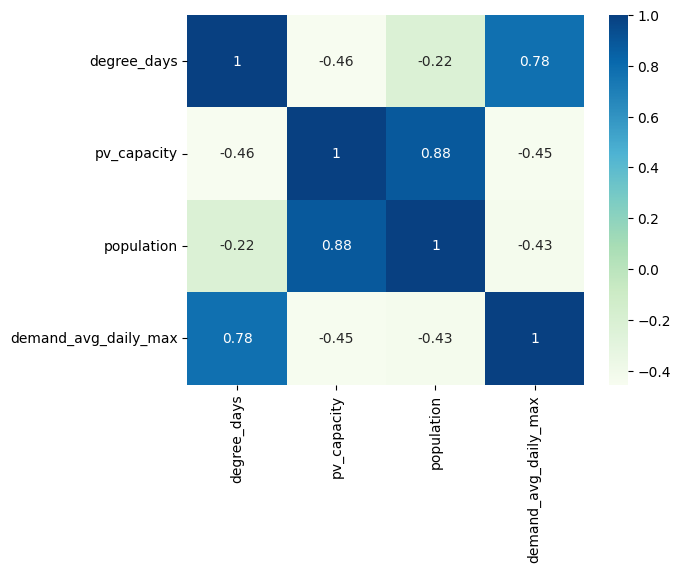

In [35]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'corr_map_heatmap.png'

# Plot a Seaborn heatmap of the correlation matrix from the abalone dataframe
sns.heatmap(df_model_reduced.corr(), cmap="GnBu", annot=True)
plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS: 
- 

### Solution to Data Processing Task 3

TASK: Pick two of the most correlated features (negative or positive) and create a scatter plot with demand. Discuss major observations 

In [36]:
# List features by highest absolute value of correlation with rings
absolute_corr_with_demand = df_model_reduced.corr()['demand_avg_daily_max'].apply(abs).sort_values(ascending=False)
print(absolute_corr_with_demand)

demand_avg_daily_max    1.000000
degree_days             0.775626
pv_capacity             0.445191
population              0.429565
Name: demand_avg_daily_max, dtype: float64


OBSERVATION: 
.

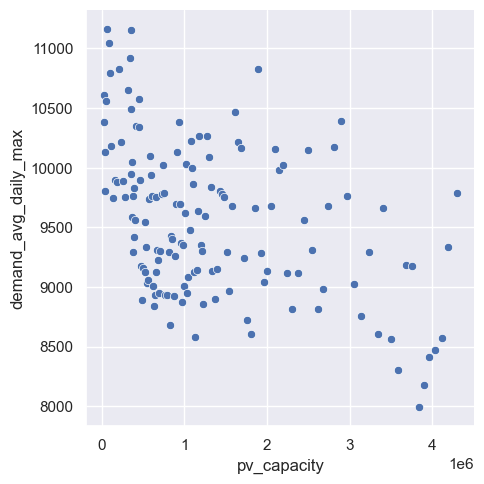

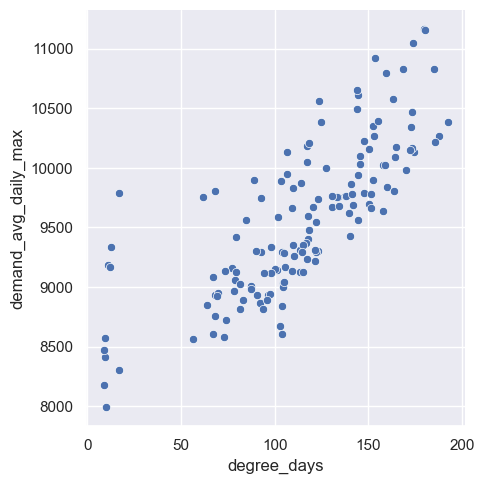

In [37]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'scatter_pv_capacity_demand.png'

# Create scatter plots of shell_w and diameter with rings, differentiating the 'sex' by colour
sns.set()
sns.relplot( 
    data = df_model_reduced, 
    kind = 'scatter', 
    x = 'pv_capacity',
    y = 'demand_avg_daily_max',
    #hue = 'sex' # Specify colours for the points
)
plt.savefig(figure_dir + figure_file_name)

# Set figure file name
figure_file_name = 'scatter_degree_days_demand.png'

sns.relplot( 
    data = df_model_reduced, 
    kind = 'scatter', 
    x = 'degree_days',
    y = 'demand_avg_daily_max',
    #hue = 'sex' # Specify colours for the points
)
plt.savefig(figure_dir + figure_file_name)


OBSERVATIONS:
- 

### Solution to Data Processing Task 4

TASK: Create histograms of the two most correlated features, and the demand. What are the major observations?  

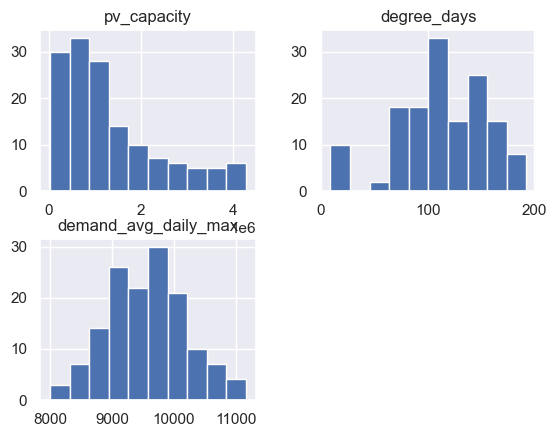

In [38]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'hist_pv_capacity_degree_days_demand.png'

#Create histograms for shell_w, diameter and rings
cols = ['pv_capacity','degree_days','demand_avg_daily_max']
df_model_reduced.hist(column=cols)
plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS:
- 

### Solution to Data Processing Task 5 

TASK: Create a 60/40 train/test split - which takes a random seed based on the experiment number to create a new dataset for every experiment.

In [39]:
#Set maximum number of experiments and train split ratio.
max_experiments = 5
train_split = 0.6

#Create train/test datasets for features and response for each experiment
for i in range(0,max_experiments):
    x_train, x_test, y_train, y_test = data_split_random(df_features.to_numpy(), df_response.to_numpy(), train_split, i)
    print('x_train for experiment number ',i, ' rows :', len(x_train))
    print('x_test  for experiment number ',i, ' rows :', len(x_test))
    print('y_train for experiment number ',i, ' rows :', len(y_train))
    print('y_test  for experiment number ',i, ' rows :', len(y_test))


x_train for experiment number  0  rows : 86
x_test  for experiment number  0  rows : 58
y_train for experiment number  0  rows : 86
y_test  for experiment number  0  rows : 58
x_train for experiment number  1  rows : 86
x_test  for experiment number  1  rows : 58
y_train for experiment number  1  rows : 86
y_test  for experiment number  1  rows : 58
x_train for experiment number  2  rows : 86
x_test  for experiment number  2  rows : 58
y_train for experiment number  2  rows : 86
y_test  for experiment number  2  rows : 58
x_train for experiment number  3  rows : 86
x_test  for experiment number  3  rows : 58
y_train for experiment number  3  rows : 86
y_test  for experiment number  3  rows : 58
x_train for experiment number  4  rows : 86
x_test  for experiment number  4  rows : 58
y_train for experiment number  4  rows : 86
y_test  for experiment number  4  rows : 58


### Solution to Data Processing Task 6

TASK: Add any other visualisation of the dataset you find appropriate (OPTIONAL).

Explore outliers in values for the two most correlated features with respect to rings: pv_capacity and temp_mean.
From the scatter plots it appears that outliers exist for pv_capacity and temp_mean so we'll create a boxplot for this range.

In [40]:
# Create directory for saving figure files
#figure_dir = "fig\\linear_model\\"
#mkdir_p(figure_dir)

# Set figure file name

#figure_file_name = 'boxplot_pv_capacity_demand.png'

#demand_for_boxplot = df_model_reduced[(df_model_reduced['demand_mean_max'] >8250) & (df_model_reduced['demand_mean_max'] < 11000)]

#Create boxplot for pv_capacity

#sns.boxplot(x="demand_mean_max",y="pv_capacity", data=demand_for_boxplot)
#plt.savefig(figure_dir + figure_file_name)

In [41]:
# Set figure file name
#figure_file_name = 'boxplot_diameter_rings.png'

#Create boxplot for diameter
#sns.boxplot(x="rings",y="diameter", hue='sex',data=abalone_for_boxplot)
#plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS:
- We might need to remove outliers prior to training a model.



## Modelling Tasks

### Solution to Modelling Task 1: 

TASK: Develop a linear regression model using all features for demand using 60 percent of data picked randomly for training and remaining for testing. Visualise your model prediction using appropriate plots. Report the RMSE and R-squared score. 

RMSE:  336.16635172456716
R-Squared:  0.737453304083501


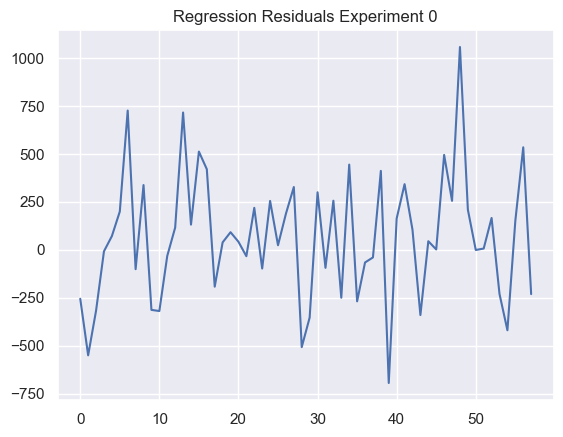

In [42]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task_1\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

#Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        df_features.to_numpy(), 
                                                                        df_response.to_numpy(), 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir)

print('RMSE: ', rmse_test_list[0])
print('R-Squared: ', rsq_test_list[0])


### Solution to Modelling Task 2: 

TASK: Develop a linear regression model with all input features, i) without normalising input data, ii) with normalising input data. 

RMSE without normalisation:  336.16635172456716
R-Squared without normalisation:  0.737453304083501


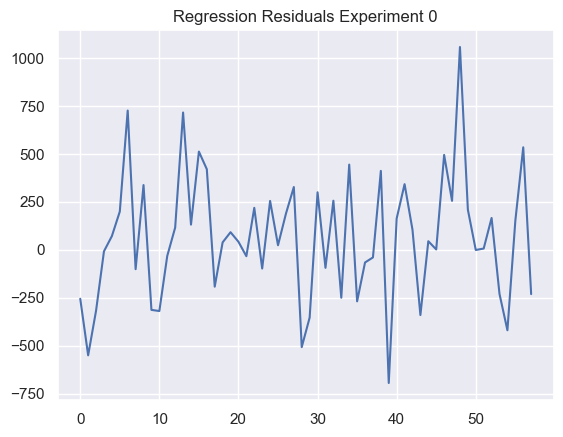

In [43]:
# Read data

# Prepare features and response
features = df_features.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task_2\\without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                         figure_dir)

print('RMSE without normalisation: ', rmse_test_list[0])
print('R-Squared without normalisation: ', rsq_test_list[0])

RMSE with normalisation:  323.6660015386244
R-Squared with normalisation:  0.7566158787950136


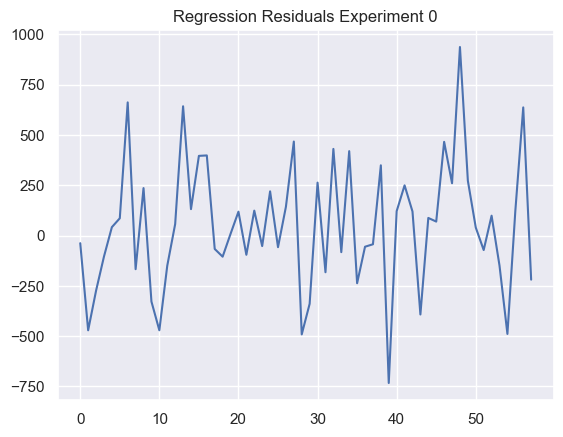

In [44]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task2\\with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE with normalisation: ', rmse_test_list[0])
print('R-Squared with normalisation: ', rsq_test_list[0])

### Solution to Modelling Task 3

TASK: Develop a linear regression model with two selected input features from the data processing step. 

RMSE without normalisation:  380.4205714245449
R-Squared without normalisation:  0.6637780501500384


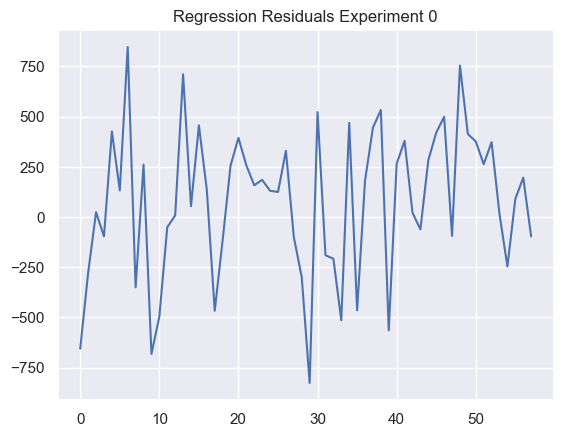

In [45]:
# Read data

# Create subset of features
df_features_subset = df_features[['degree_days','pv_capacity']]

# Prepare features and response
features = df_features_subset.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task3\\without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE without normalisation: ', rmse_test_list[0])
print('R-Squared without normalisation: ', rsq_test_list[0])

RMSE with normalisation:  582.5177354418969
R-Squared with normalisation:  0.21165488603484528


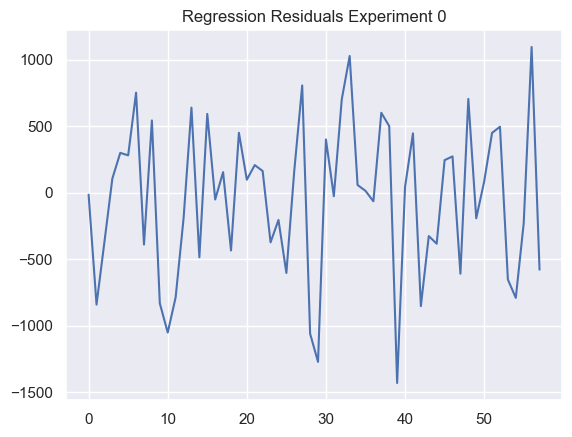

In [46]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task3\\with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE with normalisation: ', rmse_test_list[0])
print('R-Squared with normalisation: ', rsq_test_list[0])

### Solution to Modelling Task 4

TASK: In each of the above investigations, run 30 experiments each and report the mean and std of the RMSE and R-squared score of the train and test datasets. Write a paragraph to compare your results of the different approaches taken. Note that if your code can't work for 30 experiments, only 1 experiment run is fine. You won't be penalised if you just do 1 experiment run.  

#### _30 Experiments using All Features Without Normalisation_

Mean RMSE of Test dataset without normalisation:  323.3072833215701
STD RMSE of Test dataset without normalisation:  29.330516780251244
Mean RMSE of Train dataset without normalisation:  306.9737775586514
STD RMSE of Train dataset without normalisation:  19.04368965877571
Mean R-squared of Test dataset without normalisation:  0.7414763142360611
STD R-squared of Test dataset without normalisation:  0.05821123698867873
Mean R-squared of Train dataset without normalisation:  0.7608553617477942
STD R-squared of Train dataset without normalisation:  0.03900051494365548


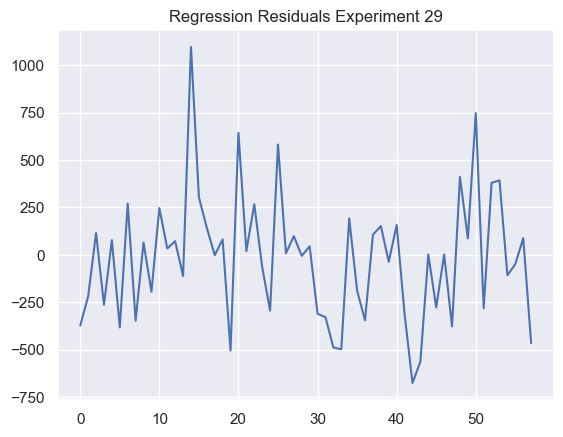

In [47]:
# Read data

# Prepare features and response
features = df_features.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\all_features_without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset without normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset without normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset without normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset without normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset without normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset without normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset without normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset without normalisation: ', std_rsq_train)

#### _30 Experiments using All Features With Normalisation_

Mean RMSE of Test dataset with normalisation:  299.16115002498
STD RMSE of Test dataset with normalisation:  23.668355604497876
Mean RMSE of Train dataset with normalisation:  281.40057598473214
STD RMSE of Train dataset with normalisation:  14.977396307024147
Mean R-squared of Test dataset with normalisation:  0.7796552334915529
STD R-squared of Test dataset with normalisation:  0.04303661801786397
Mean R-squared of Train dataset with normalisation:  0.799554967702438
STD R-squared of Train dataset with normalisation:  0.027435870290627738


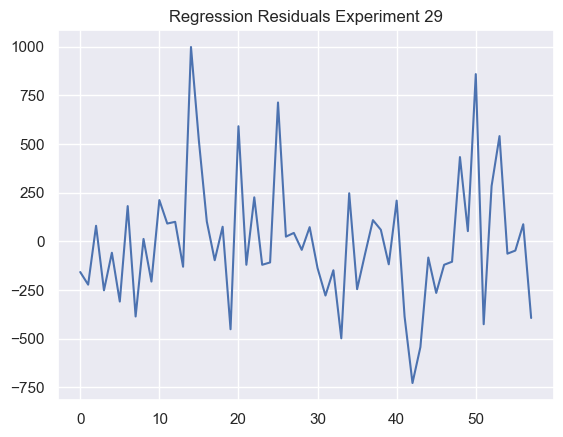

In [48]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\all_features_with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset with normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset with normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset with normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset with normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset with normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset with normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset with normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset with normalisation: ', std_rsq_train)

#### _30 Experiments using 2 Features Without Normalisation_

Mean RMSE of Test dataset without normalisation:  405.04513393231423
STD RMSE of Test dataset without normalisation:  33.36284236278805
Mean RMSE of Train dataset without normalisation:  398.144558648263
STD RMSE of Train dataset without normalisation:  20.80232998123803
Mean R-squared of Test dataset without normalisation:  0.5955106666674344
STD R-squared of Test dataset without normalisation:  0.08412624119627284
Mean R-squared of Train dataset without normalisation:  0.5987506678441219
STD R-squared of Train dataset without normalisation:  0.05485792960577217


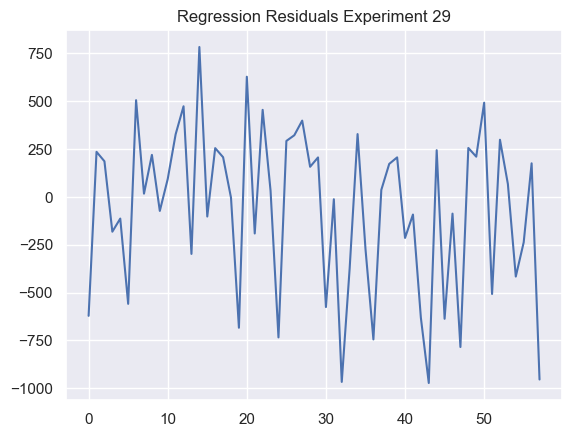

In [49]:
# Read data

# Create subset of features
df_features_subset = df_features[['degree_days','pv_capacity']]

# Prepare features and response
features = df_features_subset.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\2_features_without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset without normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset without normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset without normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset without normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset without normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset without normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset without normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset without normalisation: ', std_rsq_train)

#### _30 Experiments using 2 Features With Normalisation_

Mean RMSE of Test dataset with normalisation:  663.8140954814537
STD RMSE of Test dataset with normalisation:  282.16594663441145
Mean RMSE of Train dataset with normalisation:  507.2248197758226
STD RMSE of Train dataset with normalisation:  27.749185348394874
Mean R-squared of Test dataset with normalisation:  -0.28255006467345223
STD R-squared of Test dataset with normalisation:  1.6038949829415436
Mean R-squared of Train dataset with normalisation:  0.352771912962842
STD R-squared of Train dataset with normalisation:  0.055068844889447195


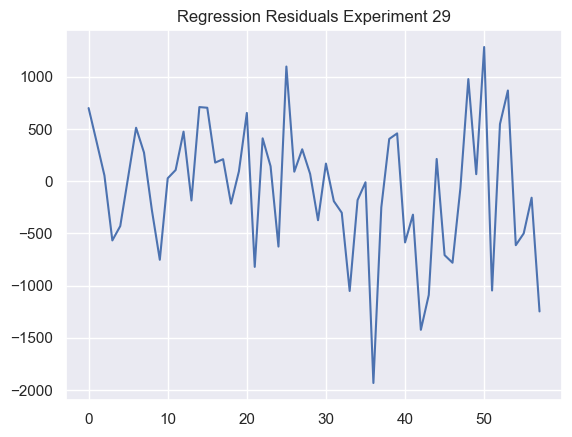

In [50]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\2_features_with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset with normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset with normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset with normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset with normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset with normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset with normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset with normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset with normalisation: ', std_rsq_train)

OBSERVATIONS:
- From the results of Modelling Tasks 2 and 3, Normalisation reduces the error and improves the explicability of the model irrespective of the choice of features. 
- From the results of Modelling Tasks 2 and 3, the error is significantly increased, while explicability of model is significantly decreased, when we only select the 2 highest correlated features.  
- From the results of Modelling Task 4:
    - Across 30 experiments, using All Features, mean RMSE of Test (2.2348 without normalising/2.1847 with normalising) is slightly greater than that of Train (2.1835 without normalising/2.1540 with normalising), while the mean R-squared value of model in Test (0.5205 without normalising/0.5420 with normalising) is about the same as that of Train (0.5399 without normalising/0.5523 with normalising). This shows that impacts of impacts of overfitting are not significant.
    - Across 30 experiments, using 2 Features, mean RMSE of Test (2.5213 without normalising/2.4096 with normalising) is slightly greater than that of Train (2.5021 without normalising/2.3963 with normalising), while the mean R-squared value of model in Test (0.3900 without normalising/0.4429 with normalising) is about the same as that of Train (0.3959 without normalising/0.44589 with normalising). This shows that impacts of impacts of overfitting are not significant.  However, normalisation greatly improves the model's explicability in this case.
    - Similar to the single experiment tests, Normalisation improves the R-squared values and hence explicability of the models, while reducing the error in prediction. Reducing the number of features produces a significantly poorer model with lower R-squared measures and higher error measures.